In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load csv file
df = pd.read_csv("2023_City-wide_Emissions_20250512.csv")
df.head()

,Questionnaire,Organization Number,Organization Name,City,Country,CDP Region,Access,Number of times reporting,C40 City,GCoM City,...,Emissions Description,Emissions Estimated,Emissions Data Group,Emissions Rank,Year covered by main inventory,Boundary of main inventory relative to jurisdiction boundary,Population in year covered by main inventory,Tool used to compile main inventory,City Location,Last update
0,Cities 2023,1850,Birmingham City Council,Birmingham,United Kingdom of Great Britain and Northern I...,Europe,public,5,False,True,...,0401 Stationary energy > Industrial buildings ...,1,SubSector,4,2019,Same - covers entire jurisdiction and nothing ...,1141700,SCATTER,NaN,04/03/2024 07:35:58 PM
1,Cities 2023,31114,City of Sydney,City of Sydney,Australia,Oceania,public,12,True,True,...,2605 Generation of grid-supplied energy > Elec...,1,GridSubSector,0,2021/2022,Same - covers entire jurisdiction and nothing ...,217748,Kinesis CCAP City Tool,POINT (151.207 -33.8675),04/03/2024 07:35:58 PM
2,Cities 2023,54116,"City of Dubuque, IA",Dubuque,United States of America,United States of America,public,6,False,True,...,0301 Stationary energy > Institutional buildin...,1,SubSector,0,2022,Same - covers entire jurisdiction and nothing ...,58873,"Consultancy-developed tool/process, please spe...",POINT (-90.5071 42.5006),04/03/2024 07:35:58 PM
3,Cities 2023,73669,"San Luis Obispo, CA",NaN,United States of America,United States of America,public,3,False,True,...,2005 IPPU > Product use - Outside Boundary,0,SubSector,0,2019,Same - covers entire jurisdiction and nothing ...,46802,Internal tool/process,NaN,04/03/2024 07:35:58 PM
4,Cities 2023,50540,"City of Albuquerque, NM",NaN,United States of America,United States of America,public,4,False,False,...,0501 Stationary Energy: energy use – Scope 1,0,SectorTotal,0,2017,Same - covers entire jurisdiction and nothing ...,556718,CIRIS,NaN,04/03/2024 07:35:58 PM


In [3]:
df.shape

(43821, 30)

In [4]:
df.dtypes

Questionnaire                                                    object
Organization Number                                               int64
Organization Name                                                object
City                                                             object
Country                                                          object
CDP Region                                                       object
Access                                                           object
Number of times reporting                                         int64
C40 City                                                           bool
GCoM City                                                          bool
Primary protocol/framework used to compile main inventory        object
Gases included in main inventory                                 object
Emissions Question Number                                        object
Emissions Question Name                                         

In [5]:
# relevant columns
cols = ['City',
        'Country',
        'Emissions Response Answer',
        'Emissions Column Name',
        'Emissions Row Name',
        'Emissions Estimated',
        'Year covered by main inventory',
        'Population in year covered by main inventory']

df_1 = df[cols]

In [6]:
df_1.head()


,City,Country,Emissions Response Answer,Emissions Column Name,Emissions Row Name,Emissions Estimated,Year covered by main inventory,Population in year covered by main inventory
0,Birmingham,United Kingdom of Great Britain and Northern I...,405210.88,Direct emissions (metric tonnes CO2e)^,Stationary energy > Industrial buildings & fac...,1,2019,1141700
1,City of Sydney,Australia,0.00,Emissions occurring outside the jurisdiction b...,Generation of grid-supplied energy > Electrici...,1,2021/2022,217748
2,Dubuque,United States of America,0.00,Direct emissions (metric tonnes CO2e)^,Stationary energy > Institutional buildings & ...,1,2022,58873
3,NaN,United States of America,0.00,Emissions occurring outside the jurisdiction b...,IPPU > Product use,0,2019,46802
4,NaN,United States of America,0.00,Emissions (metric tonnes CO2e),Stationary Energy: energy use – Scope 1,0,2017,556718


In [7]:
df_1.isnull().sum()

City                                            14684
Country                                             0
Emissions Response Answer                           0
Emissions Column Name                               0
Emissions Row Name                                  0
Emissions Estimated                                 0
Year covered by main inventory                    764
Population in year covered by main inventory        0
dtype: int64

since city column has ~33% missing data , we would want to inspect those closely

In [8]:
pivot_df = df_1[['Country', 'City', 'Emissions Response Answer']]
pivot_df.head()

,Country,City,Emissions Response Answer
0,United Kingdom of Great Britain and Northern I...,Birmingham,405210.88
1,Australia,City of Sydney,0.00
2,United States of America,Dubuque,0.00
3,United States of America,NaN,0.00
4,United States of America,NaN,0.00


In [9]:
# extra first year if range is provided like "2021/2022"
df_1['Year'] = df_1['Year covered by main inventory'].astype(str).str.extract(r'(\d{4})').astype('Int64')

/var/folders/vj/dw0hgmzj2j57h0bng46_cd6r0000gn/T/ipykernel_55204/2723244873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Year'] = df_1['Year covered by main inventory'].astype(str).str.extract(r'(\d{4})').astype('Int64')


In [10]:
# how missing values in 'City' are distributed by year
missing_yearwise = df_1[df_1['City'].isna()].groupby('Year').size().reset_index(name='Missing count')
missing_yearwise

,Year,Missing count
0,2005,4
1,2006,76
2,2010,76
3,2012,4
4,2014,152
5,2015,232
6,2016,493
7,2017,941
8,2018,2245
9,2019,3388


In [11]:
# count of missing cities by country
miss_sum = df_1[df_1['City'].isna()].groupby('Country').size().reset_index(name = 'Missing City Count')\
            .sort_values(by='Missing City Count', ascending = False)

print(miss_sum)

                                              Country  Missing City Count
0                                           Argentina                2356
33                           United States of America                1353
32  United Kingdom of Great Britain and Northern I...                1117
5                                              Brazil                1005
17                                          Indonesia                 940
9                                            Colombia                 848
10                                         Costa Rica                 760
24                                        Philippines                 553
1                                           Australia                 549
31                                             Turkey                 540
19                                           Malaysia                 532
20                                             Mexico                 501
7                                     

In [12]:
# filter rows with missing city
misscity = df_1[df_1['City'].isna()]

# how many have emissions response answers ==0
zeromiss = misscity[misscity['Emissions Response Answer']==0]
count = zeromiss.shape[0]
count



10415

In [13]:
# countries having zero emissions with missing cities
result = zeromiss[['Country','City', 'Emissions Response Answer']]
result

,Country,City,Emissions Response Answer
3,United States of America,NaN,0.0
4,United States of America,NaN,0.0
12,Indonesia,NaN,0.0
39,Canada,NaN,0.0
54,United States of America,NaN,0.0
...,...,...,...
43811,Republic of Korea,NaN,0.0
43815,India,NaN,0.0
43816,United States of America,NaN,0.0
43818,Chile,NaN,0.0


/var/folders/vj/dw0hgmzj2j57h0bng46_cd6r0000gn/T/ipykernel_55204/1008942014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misscity['Emission Category'] = misscity['Emissions Response Answer'].apply(


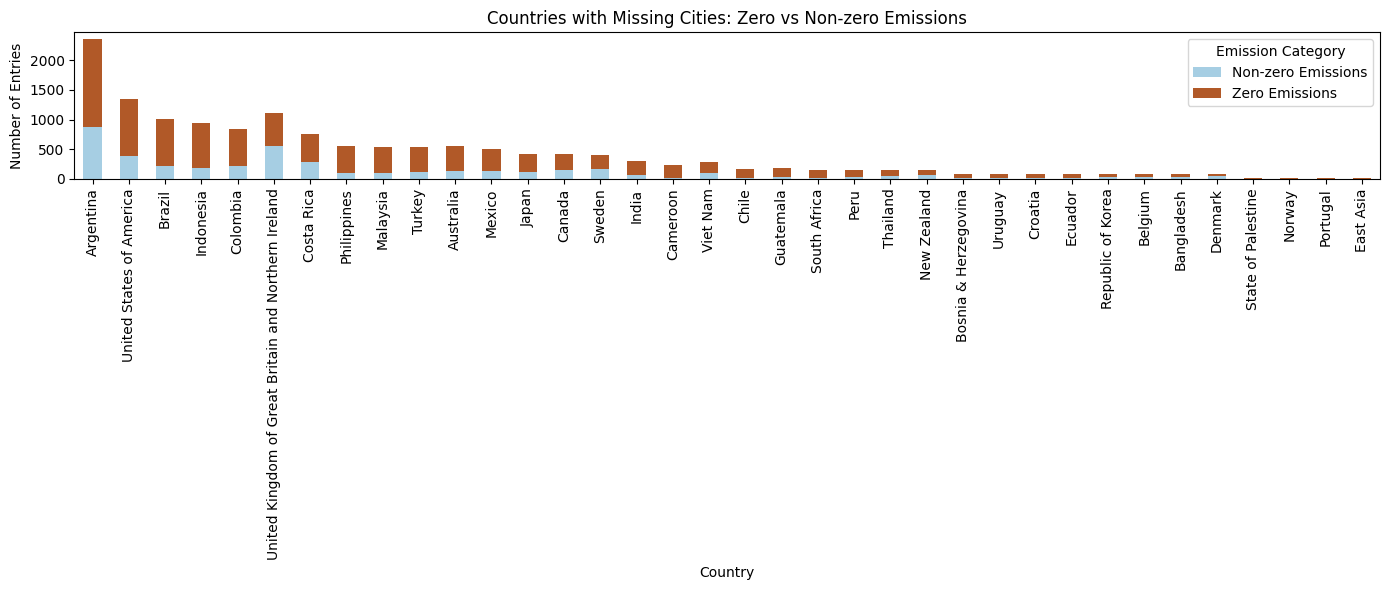

In [14]:
misscity['Emission Category'] = misscity['Emissions Response Answer'].apply(
    lambda x: 'Zero Emissions' if x == 0 else 'Non-zero Emissions'
)

summary = misscity.groupby(['Country', 'Emission Category']).size().unstack(fill_value=0)
summary = summary.sort_values(by='Zero Emissions', ascending=False)

summary.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Paired')
plt.title('Countries with Missing Cities: Zero vs Non-zero Emissions')
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.xticks(rotation=90)
plt.legend(title='Emission Category')
plt.tight_layout()
plt.show()

- **Total rows with missing cities**: ~14,684  
- **Of these, rows with `Emissions Response Answer == 0`**: ~10,415  
- That means **~71% of missing city entries** report **zero emissions**.

These are most likely **non-responses or placeholders**, not actual city-level emissions data.  
Therefore, **they're not valuable** for analysis and **can be safely dropped**.


In [15]:
# drop rows with missing cities and year
df_2 = df_1.dropna(subset=['City', 'Year'])

# Reset index after dropping
df_2.reset_index(drop=True, inplace=True)

df_2.shape


(28753, 9)

In [16]:
df_2.head()

,City,Country,Emissions Response Answer,Emissions Column Name,Emissions Row Name,Emissions Estimated,Year covered by main inventory,Population in year covered by main inventory,Year
0,Birmingham,United Kingdom of Great Britain and Northern I...,405210.88,Direct emissions (metric tonnes CO2e)^,Stationary energy > Industrial buildings & fac...,1,2019,1141700,2019
1,City of Sydney,Australia,0.00,Emissions occurring outside the jurisdiction b...,Generation of grid-supplied energy > Electrici...,1,2021/2022,217748,2021
2,Dubuque,United States of America,0.00,Direct emissions (metric tonnes CO2e)^,Stationary energy > Institutional buildings & ...,1,2022,58873,2022
3,Can Tho City,Viet Nam,11474.00,Direct emissions (metric tonnes CO2e)^,Total IPPU,1,2022,1253893,2022
4,Bloomington,United States of America,989809.00,Indirect emissions from the use of grid-suppli...,Total Stationary Energy,1,2022,89000,2022


In [17]:
# checking cities with zero emissions, it is not possible for big cities to have zero emissions
zero_emi = df_2[df_2['Emissions Response Answer']==0]
count_zero = zero_emi['City'].nunique()

zero_emi_country = zero_emi.groupby('Country')['City'].nunique().reset_index(name='Zero Emissions Cities')
print(zero_emi_country)

                                              Country  Zero Emissions Cities
0                                           Argentina                      5
1                                           Australia                     10
2                                          Bangladesh                      1
3                                             Belgium                      1
4                                              Brazil                     25
..                                                ...                    ...
68  United Kingdom of Great Britain and Northern I...                     29
69                        United Republic of Tanzania                      1
70                           United States of America                    113
71                                            Uruguay                      1
72                                           Viet Nam                      4

[73 rows x 2 columns]


In [18]:
zero_emi_yearwise = zero_emi.groupby('Year').size().reset_index(name='Zero Emissions Count')
zero_emi_yearwise

,Year,Zero Emissions Count
0,2000,59
1,2007,76
2,2008,2
3,2009,72
4,2010,73
5,2011,55
6,2012,76
7,2013,56
8,2014,184
9,2015,524


In [19]:
df_2['City'].unique()

array(['Birmingham', 'City of Sydney', 'Dubuque', 'Can Tho City',
       'Bloomington', 'Los Angeles', 'San Francisco', 'JIMAV',
       'Ahmedabad', 'Boynton Beach', 'Kyoto', 'Salt Lake City',
       'Des Moines', 'Uppsala', 'Porto', 'Dubai', 'Lisbon', 'Chihuahua',
       'Grand Rapids', 'Bridgewater', 'Campinas', 'Recife', 'Curitiba',
       'Miami Beach', 'Cupertino', 'Mannheim', 'Columbia, MO',
       'Mar del Plata', 'Kaohsiung', 'Evanston', 'Barcelona', 'Quito',
       'Naga', 'Bradford', 'Arendal', 'Santa Rosa', 'Southampton',
       'Guatemala City', 'Whitby', 'Las Vegas', "L'Aquila", 'Portland',
       'Mendoza', 'Daegu-si', 'Helsingør', 'Torino', 'Chicago', 'Amman',
       'Ljubljana', 'João Pessoa', 'Cape Town', 'Adelaide', 'Tallinn',
       'Rotterdam', 'Seoul', 'Tampa', 'Reykjavík', 'Lakewood', 'Nairobi',
       'Dar es Salaam', 'Paraíso', 'São Paulo', 'Sabaneta', 'Wellington',
       'Guadalajara', 'Moreland', 'Lappeenranta', 'Milano', 'Rochester',
       'Dalian', 'Peñalo

In [20]:
# It is possible that some emissions data might have not been reported
# either due to missing data or non-disclosure or data gaps. For simplicity, we will drops these rows

# exclude zero emissions rows for proper analysis
df2 = df_2[df_2['Emissions Response Answer'] != 0]
df2.shape


(9191, 9)

## EDA

In [21]:
df2.describe()

,Emissions Response Answer,Emissions Estimated,Population in year covered by main inventory,Year
count,9.191000e+03,9191.0,9.191000e+03,9191.0
mean,1.000797e+06,1.0,1.554977e+06,2019.819606
std,8.968327e+06,0.0,3.118643e+06,1.833223
min,-1.313386e+06,1.0,0.000000e+00,2000.0
25%,8.105485e+03,1.0,1.598130e+05,2019.0
50%,7.745100e+04,1.0,4.376190e+05,2020.0
75%,4.331360e+05,1.0,1.451853e+06,2021.0
max,5.687008e+08,1.0,2.764469e+07,2023.0


In [22]:
# check if any emissions are negative
negative_emissions = df2[df2['Emissions Response Answer'] < 0]
negative_emissions


,City,Country,Emissions Response Answer,Emissions Column Name,Emissions Row Name,Emissions Estimated,Year covered by main inventory,Population in year covered by main inventory,Year
604,Hong Kong,"China, Hong Kong Special Administrative Region",-467463.33,Direct emissions (metric tonnes CO2e)^,AFOLU > Land use,1,2021,7413100,2021
732,Turku,Finland,-3000.00,Direct emissions (metric tonnes CO2e)^,AFOLU > Land use,1,2021,195137,2021
1059,Edmonton,Canada,-40735.00,Direct emissions (metric tonnes CO2e)^,AFOLU > Land use,1,2022,1087803,2022
1172,Miraflores,Peru,-500.00,Direct emissions (metric tonnes CO2e)^,AFOLU > Land use,1,2019,106735,2019
1361,Bournemouth,United Kingdom of Great Britain and Northern I...,-15461.20,Direct emissions (metric tonnes CO2e)^,AFOLU > Land use,1,2019,395331,2019
...,...,...,...,...,...,...,...,...,...
27470,Madrid,Spain,-18191.00,Direct emissions (metric tonnes CO2e)^,Total AFOLU,1,2020,3334730,2020
27851,Paris,France,-11000.00,Direct emissions (metric tonnes CO2e)^,Total AFOLU,1,2021,2181174,2021
27918,Daegu-si,Republic of Korea,-315839.00,Direct emissions (metric tonnes CO2e)^,Total AFOLU,1,2020,2468000,2020
27926,Los Angeles,United States of America,-101558.00,Direct emissions (metric tonnes CO2e)^,AFOLU > Land use,1,2021,3849297,2021


In [23]:
# inspect AFOLU-related rows from negatives
afolu_rows = negative_emissions[negative_emissions['Emissions Row Name'].str.contains("AFOLU")]
afolu_rows


,City,Country,Emissions Response Answer,Emissions Column Name,Emissions Row Name,Emissions Estimated,Year covered by main inventory,Population in year covered by main inventory,Year
604,Hong Kong,"China, Hong Kong Special Administrative Region",-467463.33,Direct emissions (metric tonnes CO2e)^,AFOLU > Land use,1,2021,7413100,2021
732,Turku,Finland,-3000.00,Direct emissions (metric tonnes CO2e)^,AFOLU > Land use,1,2021,195137,2021
1059,Edmonton,Canada,-40735.00,Direct emissions (metric tonnes CO2e)^,AFOLU > Land use,1,2022,1087803,2022
1172,Miraflores,Peru,-500.00,Direct emissions (metric tonnes CO2e)^,AFOLU > Land use,1,2019,106735,2019
1361,Bournemouth,United Kingdom of Great Britain and Northern I...,-15461.20,Direct emissions (metric tonnes CO2e)^,AFOLU > Land use,1,2019,395331,2019
...,...,...,...,...,...,...,...,...,...
27470,Madrid,Spain,-18191.00,Direct emissions (metric tonnes CO2e)^,Total AFOLU,1,2020,3334730,2020
27851,Paris,France,-11000.00,Direct emissions (metric tonnes CO2e)^,Total AFOLU,1,2021,2181174,2021
27918,Daegu-si,Republic of Korea,-315839.00,Direct emissions (metric tonnes CO2e)^,Total AFOLU,1,2020,2468000,2020
27926,Los Angeles,United States of America,-101558.00,Direct emissions (metric tonnes CO2e)^,AFOLU > Land use,1,2021,3849297,2021


It seems that the negative emissions are tied to AFOLU (Agriculture, Forestry and Other land use). These activities include carbon swquestrations through land use and froestry management, that can reduce overall emissions, which is why they are negative

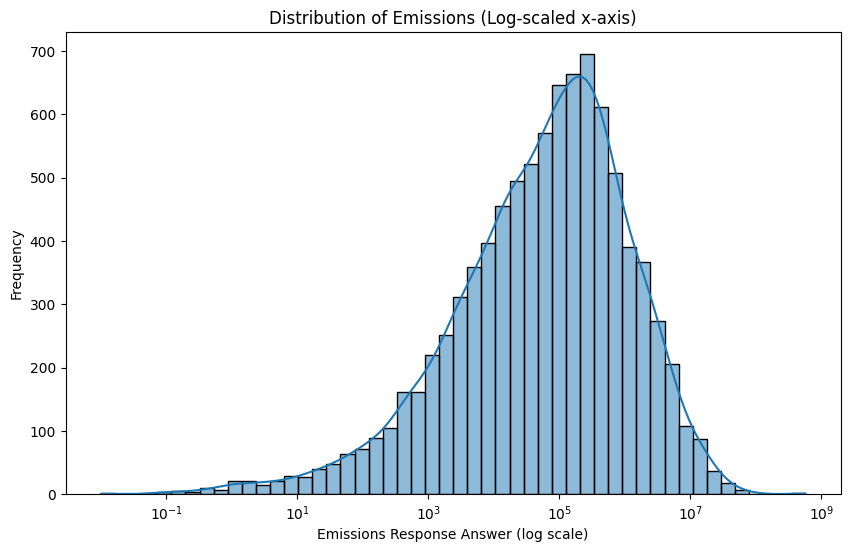

In [24]:
# emissions distribution (log-scaled x-axis for better spread)
plt.figure(figsize=(10, 6))
sns.histplot(df2['Emissions Response Answer'], kde=True, bins=50, log_scale=(True, False))
plt.title('Distribution of Emissions (Log-scaled x-axis)')
plt.xlabel('Emissions Response Answer (log scale)')
plt.ylabel('Frequency')
plt.show()


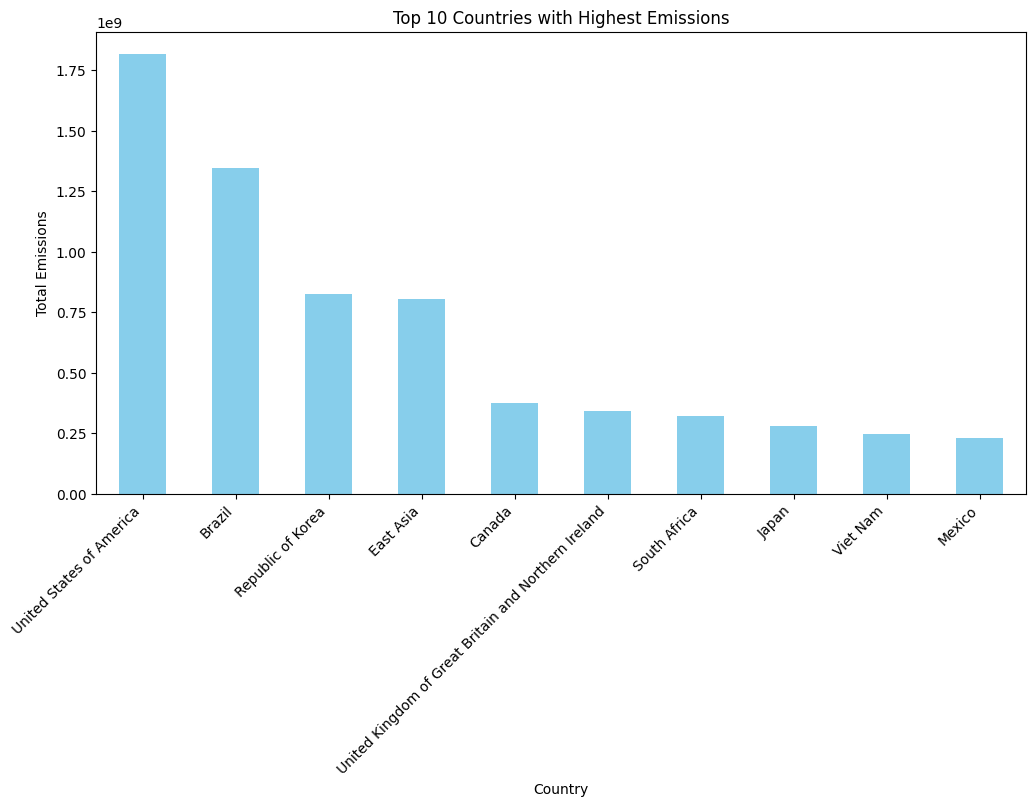

In [25]:
# top emitting countries
country_emissions = df2.groupby('Country')['Emissions Response Answer'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
country_emissions.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Emissions')
plt.xlabel('Country')
plt.ylabel('Total Emissions')
plt.xticks(rotation=45, ha='right')
plt.show()

## including negative emissions here, if you exclude the negative emissions , UK and Ireland place 2nd

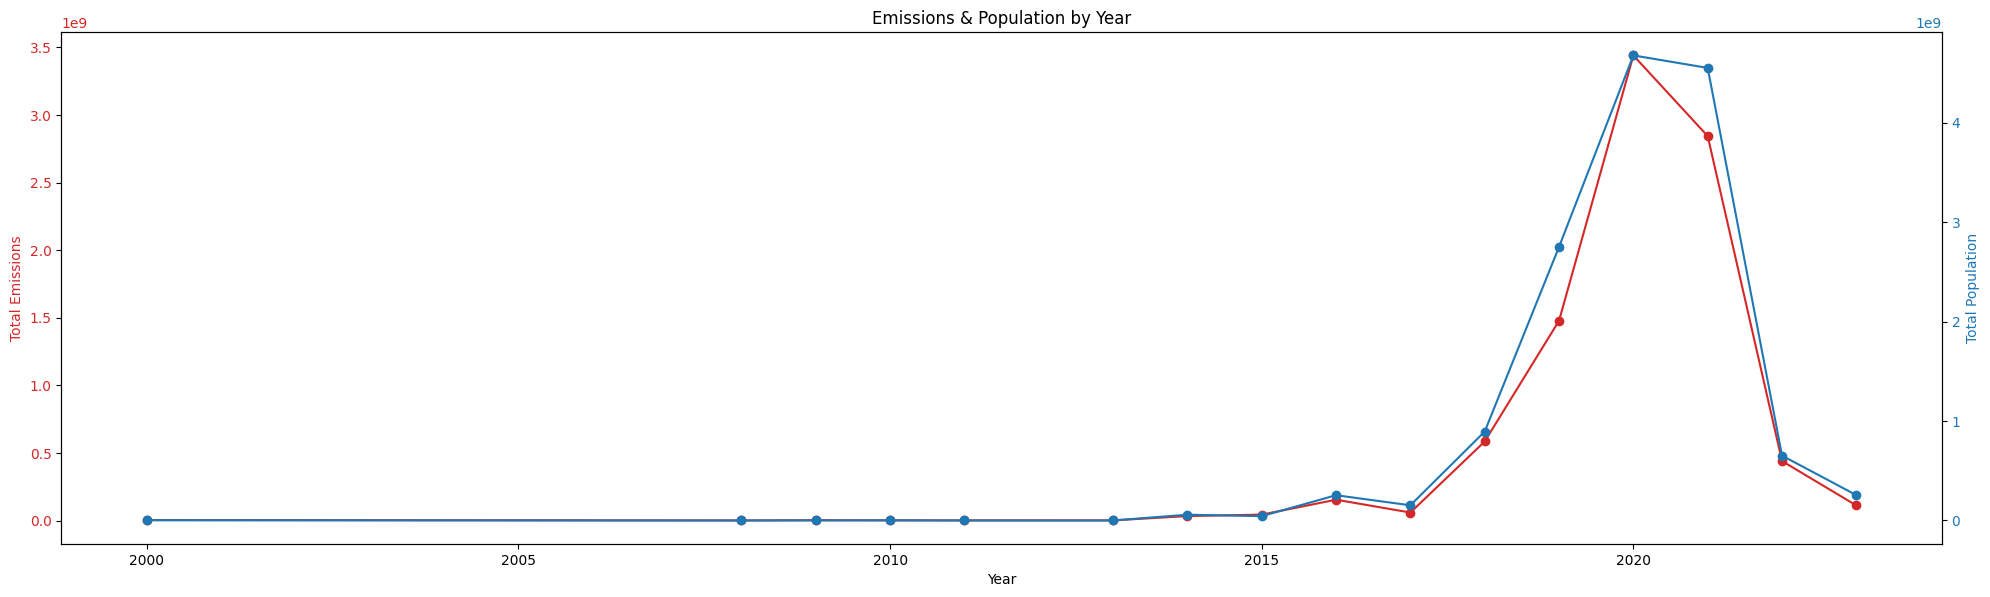

In [26]:
# emissions vs popn over time
df_grouped = df2.groupby('Year').agg({
    'Emissions Response Answer': 'sum',  # total emissions per year
    'Population in year covered by main inventory': 'sum'  # total popn per year
}).reset_index()

fig, ax1 = plt.subplots(figsize=(20, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Emissions', color='tab:red')
ax1.plot(df_grouped['Year'], df_grouped['Emissions Response Answer'], color='tab:red', label='Emissions', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:red')


ax2 = ax1.twinx()
ax2.set_ylabel('Total Population', color='tab:blue')
ax2.plot(df_grouped['Year'], df_grouped['Population in year covered by main inventory'], color='tab:blue', label='Population', marker='o')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()
plt.title('Emissions & Population by Year')
plt.show()

- Emissions and population both peaked in 2020, suggesting increased reporting or real growth during that period.
- The sudden drop after 2021 and flatline before 2017 likely reflect gaps in data reporting rather than actual trends.

In [27]:
# to avoid misinterpretation, cities with negative reported emissions are excluded from top/bottom emission analysis.
# these -ve values often reflect carbon sequestration, which do not represent total gross emissions and can distort rankings    

# remove negative emission rows before comparing cities
df_positive = df2[df2['Emissions Response Answer'] > 0]
city_emissions = df_positive.groupby('City')['Emissions Response Answer'].sum().reset_index()
top_cities = city_emissions.sort_values(by='Emissions Response Answer', ascending=False).head(10)
bottom_cities = city_emissions.sort_values(by='Emissions Response Answer').head(10)
print("Top 10 Emitting Cities:")
print(top_cities)
print("\nBottom 10 Emitting Cities:")
print(bottom_cities)


Top 10 Emitting Cities:
              City  Emissions Response Answer
355   São Leopoldo               1.138447e+09
181      Kaohsiung               2.553226e+08
254  New York City               2.352430e+08
157    Ho Chi Minh               2.298549e+08
292        Qingdao               2.245900e+08
111          Dubai               2.160066e+08
374          Tokyo               2.048356e+08
336          Seoul               2.038484e+08
253     New Taipei               1.841185e+08
382       Ulsan-si               1.783326e+08

Bottom 10 Emitting Cities:
          City  Emissions Response Answer
105      Delhi                      59.44
178    Jundiaí                     402.89
42    Blantyre                    1140.00
54    Brasília                    9518.75
185   Klaipeda                   20251.50
80   Charlotte                   30327.74
419      Åseda                   51598.00
239     Monaco                   73560.00
280   Piedmont                   94849.00
122    Extrema        

Although Delhi has a much larger population and is frequently cited for poor air quality, its reported carbon emissions are lower than cities like NYC. This is likely a result of incomplete or inconsistent reporting rather than an accurate reflection of actual emissions levels. Such discrepancies highlight the importance of standardising emissions reporting across cities.

FEATURE ENGINEERING

In [28]:
# drop zero population
df2 = df2[df2['Population in year covered by main inventory'] > 0]

df2['Emissions per capita'] = df2['Emissions Response Answer'] / df2['Population in year covered by main inventory']

In [29]:
# categorize emissions
negative_emissions = df2[df2['Emissions Response Answer'] < 0]
positive_emissions = df2[df2['Emissions Response Answer'] >= 0]
bins = [0, 10000, 100000, 1000000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
positive_emissions['Emissions Category'] = pd.cut(positive_emissions['Emissions Response Answer'], bins=bins, labels=labels, right=False)
negative_emissions['Emissions Category'] = 'Negative Emissions'
df2_combined = pd.concat([positive_emissions, negative_emissions])
df2_combined[['City', 'Emissions Response Answer', 'Emissions Category']].head()


/var/folders/vj/dw0hgmzj2j57h0bng46_cd6r0000gn/T/ipykernel_55204/1924982355.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_emissions['Emissions Category'] = pd.cut(positive_emissions['Emissions Response Answer'], bins=bins, labels=labels, right=False)
/var/folders/vj/dw0hgmzj2j57h0bng46_cd6r0000gn/T/ipykernel_55204/1924982355.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_emissions['Emissions Category'] = 'Negative Emissions'


,City,Emissions Response Answer,Emissions Category
0,Birmingham,405210.88,High
3,Can Tho City,11474.00,Medium
4,Bloomington,989809.00,High
7,JIMAV,518557.00,High
13,Uppsala,498.00,Low


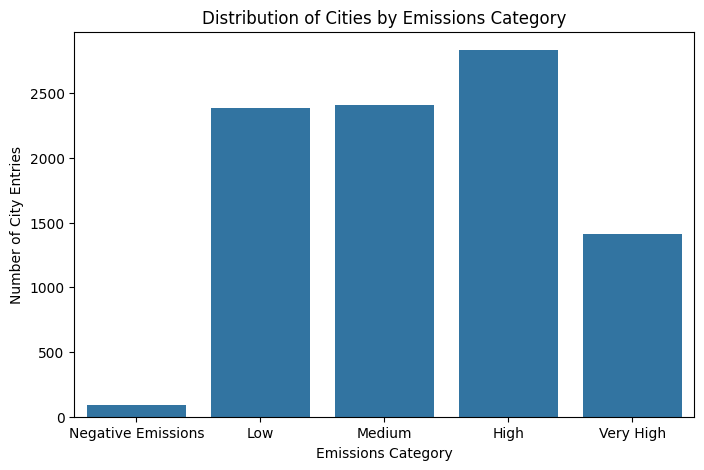

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data=df2_combined, x='Emissions Category', order=['Negative Emissions', 'Low', 'Medium', 'High', 'Very High'])
plt.title('Distribution of Cities by Emissions Category')
plt.ylabel('Number of City Entries')
plt.xlabel('Emissions Category')
plt.show()

Most cities fall into the "Low", "Medium" or "High" emissions categories.
Negative emissions remain a small but important subset—often tied to land and forestry projects.

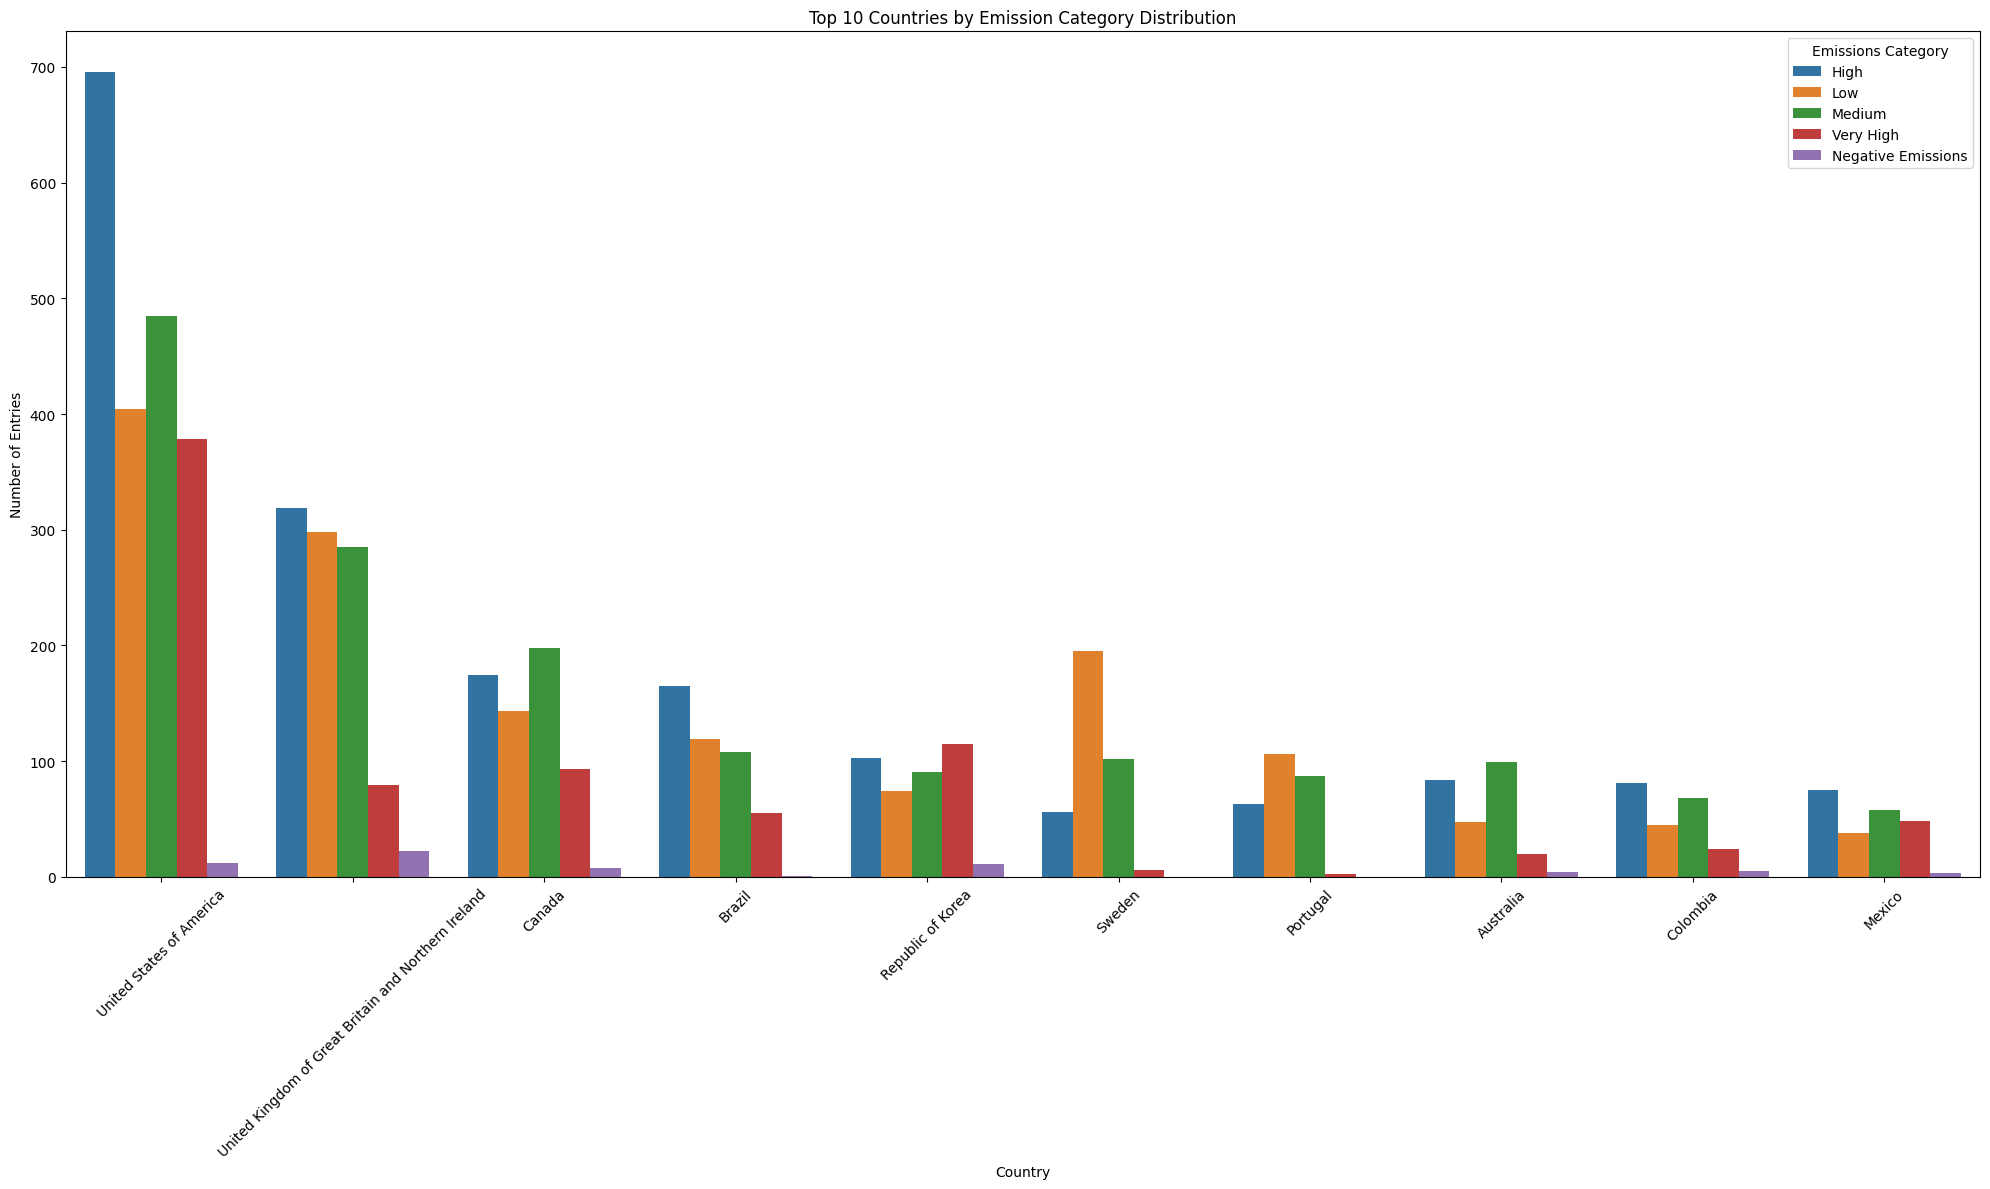

In [31]:
# emissions category by top countries
top_countries = df2_combined['Country'].value_counts().head(10).index
subset = df2_combined[df2_combined['Country'].isin(top_countries)]

plt.figure(figsize=(20, 12))
sns.countplot(data=subset, x='Country', hue='Emissions Category',
              order=top_countries)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Emission Category Distribution')
plt.ylabel('Number of Entries')
plt.tight_layout()
plt.show()


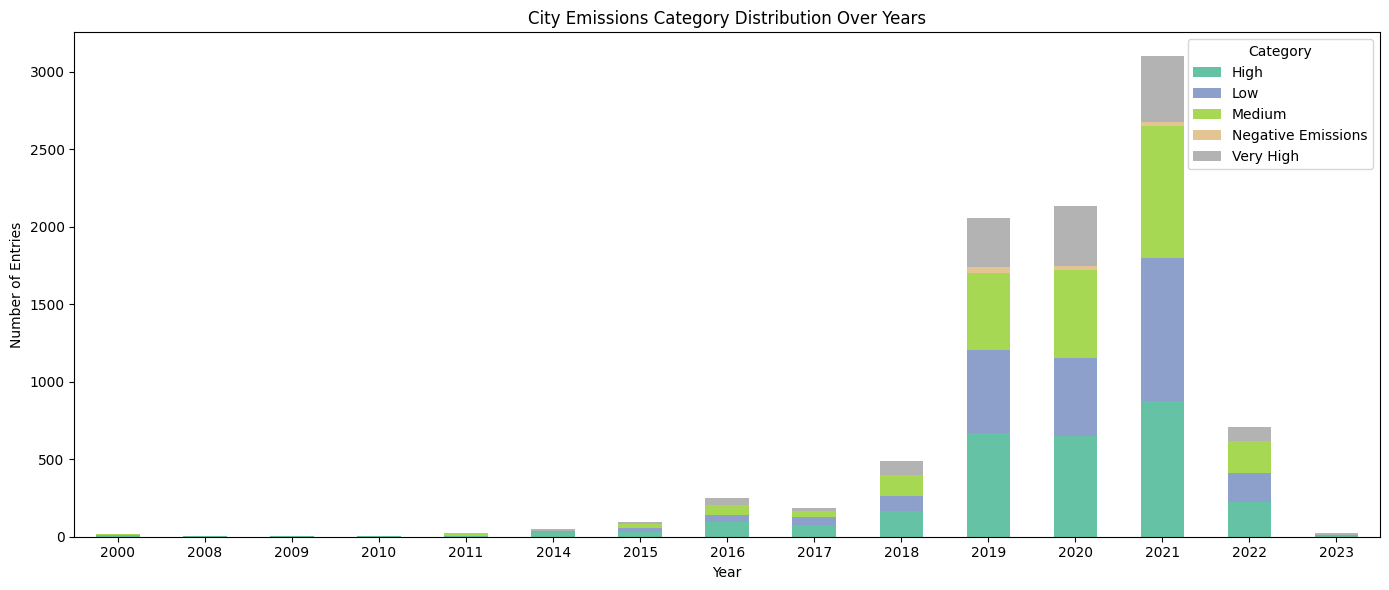

In [32]:
# emissions category over years
yearly_category = df2_combined.groupby(['Year', 'Emissions Category']).size().unstack().fillna(0)
yearly_category.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')
plt.title('City Emissions Category Distribution Over Years')
plt.ylabel('Number of Entries')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# rows where population in the year was 0 are removed, that is why 2021 has more emissions than 2020 here

In [ ]:
# regional trend analysis to explore geographical trends
region_lookup = df[['City', 'Country', 'CDP Region']].dropna().drop_duplicates()
region_lookup

,City,Country,CDP Region
0,Birmingham,United Kingdom of Great Britain and Northern I...,Europe
1,City of Sydney,Australia,Oceania
2,Dubuque,United States of America,United States of America
5,Can Tho City,Viet Nam,Southeast Asia
6,Bloomington,United States of America,United States of America
...,...,...,...
16710,Allentown,United States of America,United States of America
27520,Wichita,United States of America,United States of America
28678,Santa Marta,Colombia,Latin America
29759,Winona,United States of America,United States of America


In [34]:
df2 = df2.merge(region_lookup, on=['City', 'Country'], how='inner')
print(df2[['City', 'Country', 'CDP Region']].drop_duplicates().head())
print(df2.shape)

           City                                            Country  \
0    Birmingham  United Kingdom of Great Britain and Northern I...   
1  Can Tho City                                           Viet Nam   
2   Bloomington                           United States of America   
3         JIMAV                                             Mexico   
4       Uppsala                                             Sweden   

                 CDP Region  
0                    Europe  
1            Southeast Asia  
2  United States of America  
3             Latin America  
4                    Europe  
(9137, 11)


In [38]:
# group by region and year
region_year = df2.groupby(['CDP Region', 'Year'])['Emissions Response Answer'].sum().reset_index()
region_pivot = region_year.pivot(index='CDP Region', columns='Year', values='Emissions Response Answer')
region_pivot = region_pivot.fillna(0)
region_pivot.head()

Year,2000,2008,2009,2010,2011,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
CDP Region,,,,,,,,,,,,,,,
Africa,0.0,0.0,0.0,0.00,0.0,0.00,7029258.00,46030347.52,15912706.01,1.040138e+07,3.125142e+08,6.207093e+07,1.460422e+08,1.140000e+03,0.0
Canada,0.0,0.0,0.0,0.00,1149245.0,0.00,653152.00,67734668.53,0.00,0.000000e+00,0.000000e+00,6.134825e+07,1.412156e+08,1.041927e+08,0.0
East Asia,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.000000e+00,4.616612e+07,1.227381e+09,1.008381e+09,0.000000e+00,0.0
Europe,3657382.0,488582.0,0.0,0.00,0.0,0.00,312174.86,4570116.00,0.00,2.019142e+07,3.114832e+08,1.969991e+08,2.787887e+08,2.023880e+08,0.0
Latin America,0.0,0.0,0.0,1228198.96,0.0,32970753.69,11961425.36,20486787.29,36013950.23,1.284560e+08,1.050177e+08,1.413169e+09,1.358144e+08,1.608297e+06,0.0


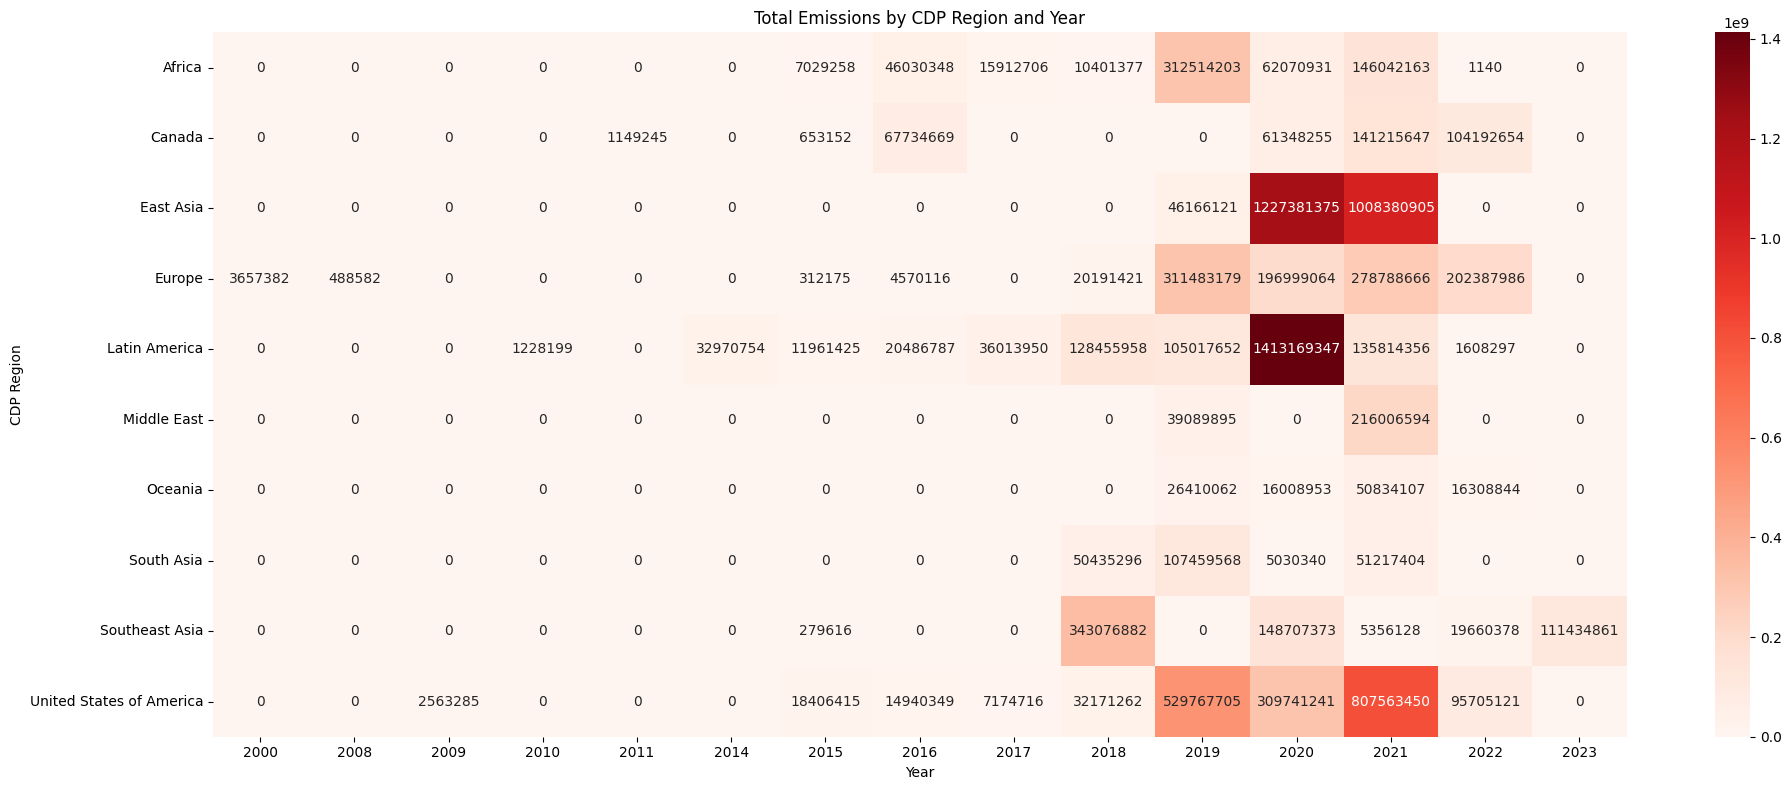

In [40]:
plt.figure(figsize=(20, 8))
sns.heatmap(region_pivot, cmap='Reds', annot=True, fmt='.0f')
plt.title('Total Emissions by CDP Region and Year')
plt.xlabel('Year')
plt.ylabel('CDP Region')
plt.tight_layout()
plt.show()


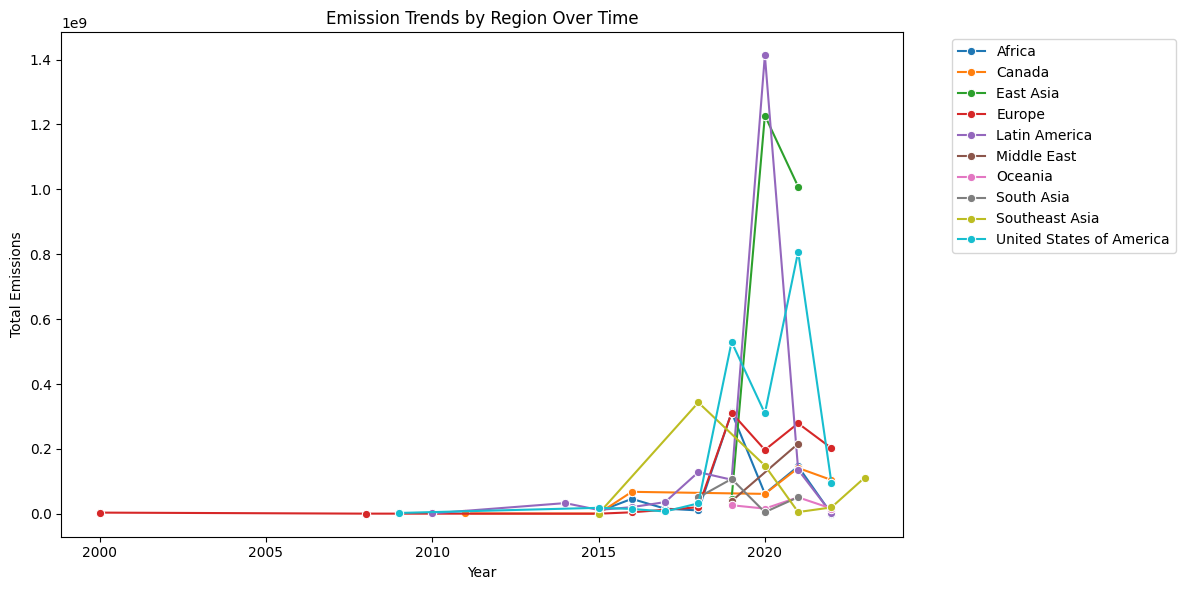

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_year, x='Year', y='Emissions Response Answer', hue='CDP Region', marker='o')
plt.title('Emission Trends by Region Over Time')
plt.ylabel('Total Emissions')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Some regions show consistent reporting and rising emissions (e.g., Latin America), while others have gaps or volatility.
This might reflect regional differences in reporting practices or actual emission patterns.